In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [287]:
diabetes_df=pd.read_csv("/content/drive/MyDrive/GTC_Internship/diabetes/diabetes - diabetes.csv")

In [288]:
pd.set_option('display.max_columns', None)

# Phase 1: EDA

In [289]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [290]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [291]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [292]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [293]:
diabetes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [294]:
diabetes_df.shape

(768, 9)

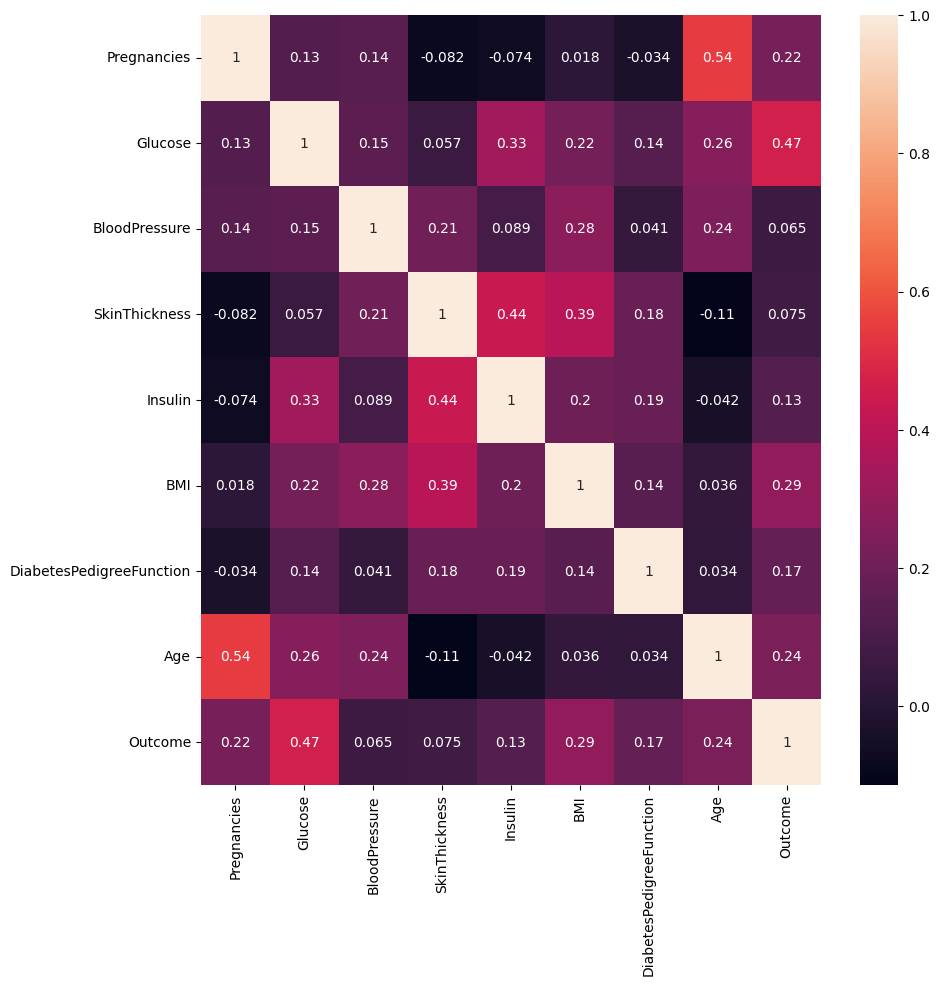

In [295]:
corr=diabetes_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

- How many patients with diabetes ?

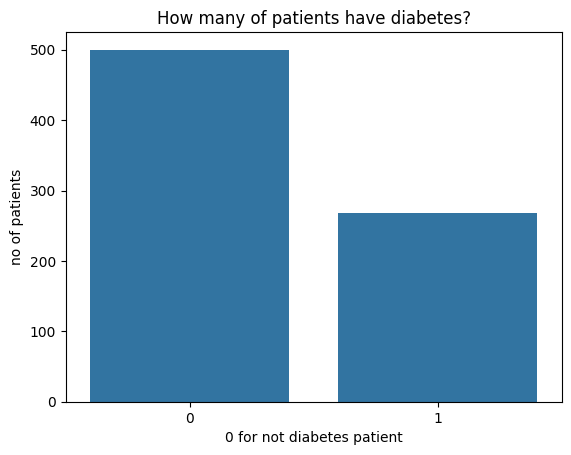

In [296]:
plt.figure()
sns.countplot(data=diabetes_df,x='Outcome')
plt.title("How many of patients have diabetes?")
plt.xlabel("0 for not diabetes patient")
plt.ylabel("no of patients")
plt.show()

- The relation between clucose level and outcome

In [297]:
np.mean(diabetes_df[diabetes_df['Outcome']==1]['Glucose'])

np.float64(141.25746268656715)

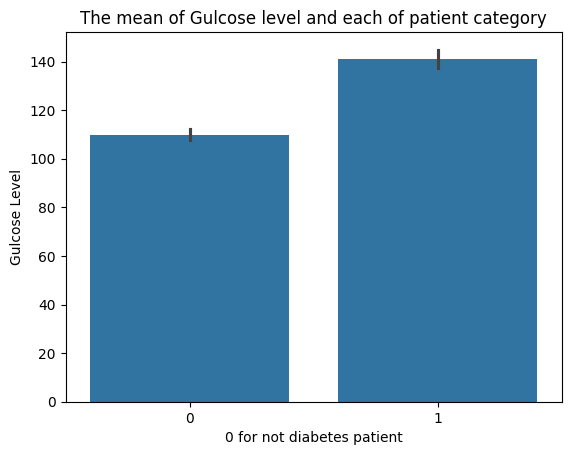

In [298]:
plt.figure()
sns.barplot(data=diabetes_df,x=pd.Categorical(diabetes_df['Outcome']),y='Glucose')
plt.title("The mean of Gulcose level and each of patient category")
plt.xlabel("0 for not diabetes patient")
plt.ylabel("Gulcose Level")
plt.show()

- is number of pregnancies affect glucose levels?

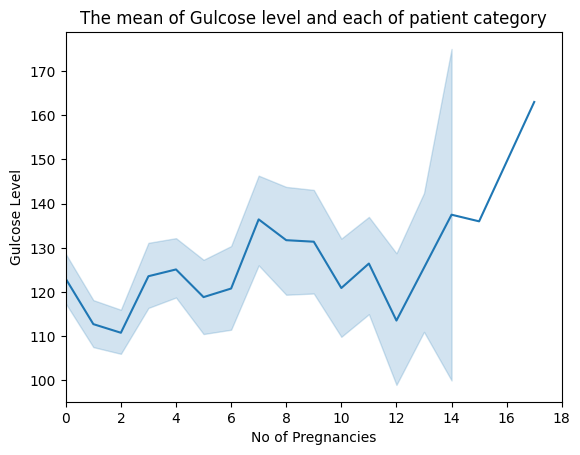

In [299]:
plt.figure()
sns.lineplot(data=diabetes_df,x='Pregnancies',y='Glucose')
plt.xlim(0,18)
plt.title("The mean of Gulcose level and each of patient category")
plt.xlabel("No of Pregnancies")
plt.ylabel("Gulcose Level")
plt.show()

- what about women with diabetes

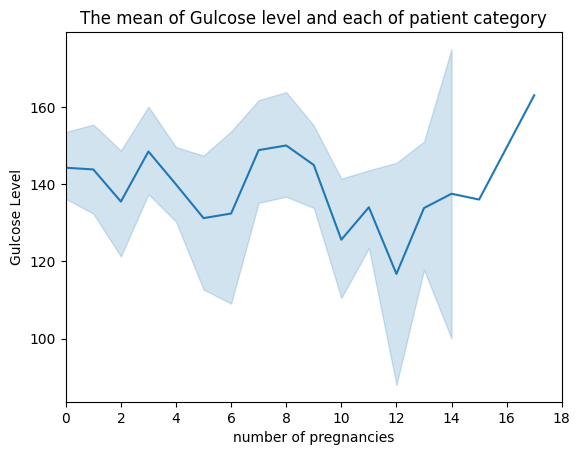

In [300]:
plt.figure()
women_with_diabetes=diabetes_df[diabetes_df['Outcome']==1]
sns.lineplot(data=women_with_diabetes,x='Pregnancies',y='Glucose')
plt.xlim(0,18)
plt.title("The mean of Gulcose level and each of patient category")
plt.xlabel("number of pregnancies")
plt.ylabel("Gulcose Level")
plt.show()

- most women with higher pregnancy number get higher glucose level especially between 6 to 10 and more than 16

- is a familly history of diabetes affect glucose level for who's have diabetes or not?

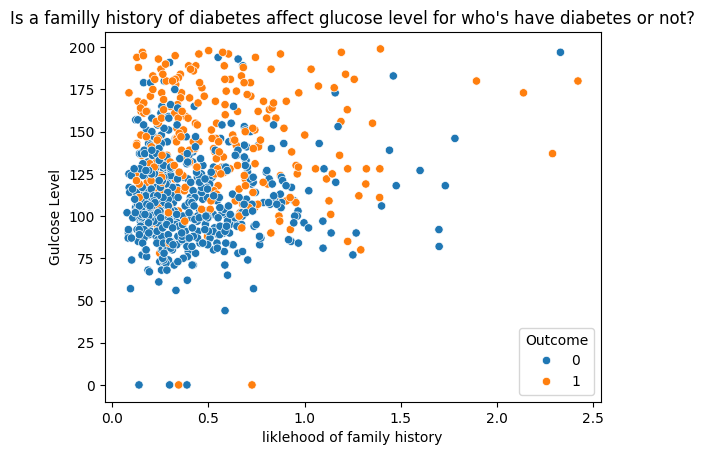

In [301]:
plt.figure()
sns.scatterplot(data=diabetes_df,x='DiabetesPedigreeFunction',y='Glucose',hue='Outcome')
plt.title("Is a familly history of diabetes affect glucose level for who's have diabetes or not?")
plt.xlabel("liklehood of family history")
plt.ylabel("Gulcose Level")
plt.show()

- most of people diagnosed with diabetes with low liklehood of family history but in higher liklehood most of them diagnosed with
- that's mean people behaviour's has a higher effect of disease more than family history.

- The relation between clucose levels and insluin

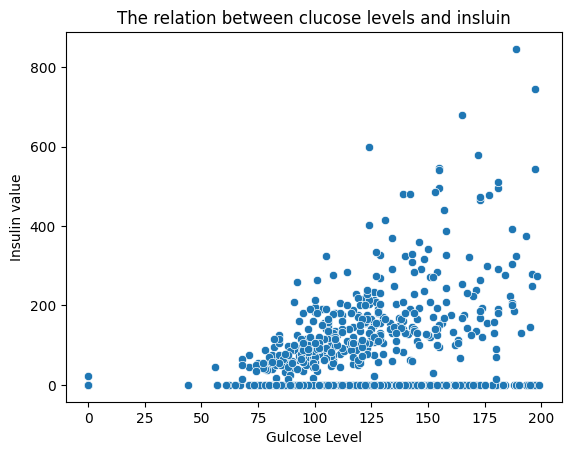

In [302]:
plt.figure()
sns.scatterplot(data=diabetes_df,x='Glucose',y='Insulin')
plt.title("The relation between clucose levels and insluin")
plt.xlabel("Gulcose Level")
plt.ylabel("Insulin value")
plt.show()

- This zero value not normal may come from people who do not enter this value

- So, we conculde more Gulcose mean more insulin

- what is the average age for people with and without diabetes

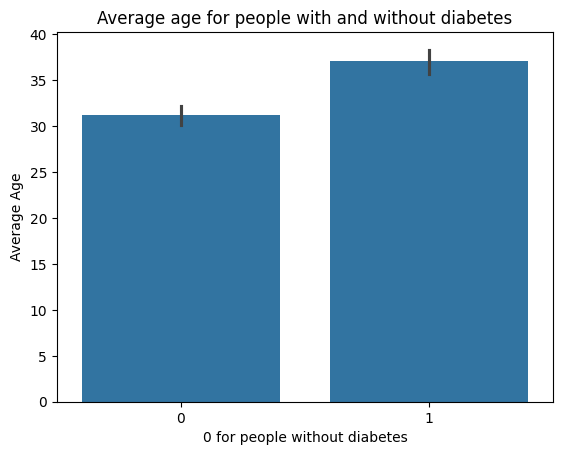

In [303]:
plt.figure()
sns.barplot(data=diabetes_df,x='Outcome',y='Age')
plt.title("Average age for people with and without diabetes")
plt.xlabel("0 for people without diabetes")
plt.ylabel("Average Age")
plt.show()

- is higher age always mean higher blood pressuer and higher glucose level?

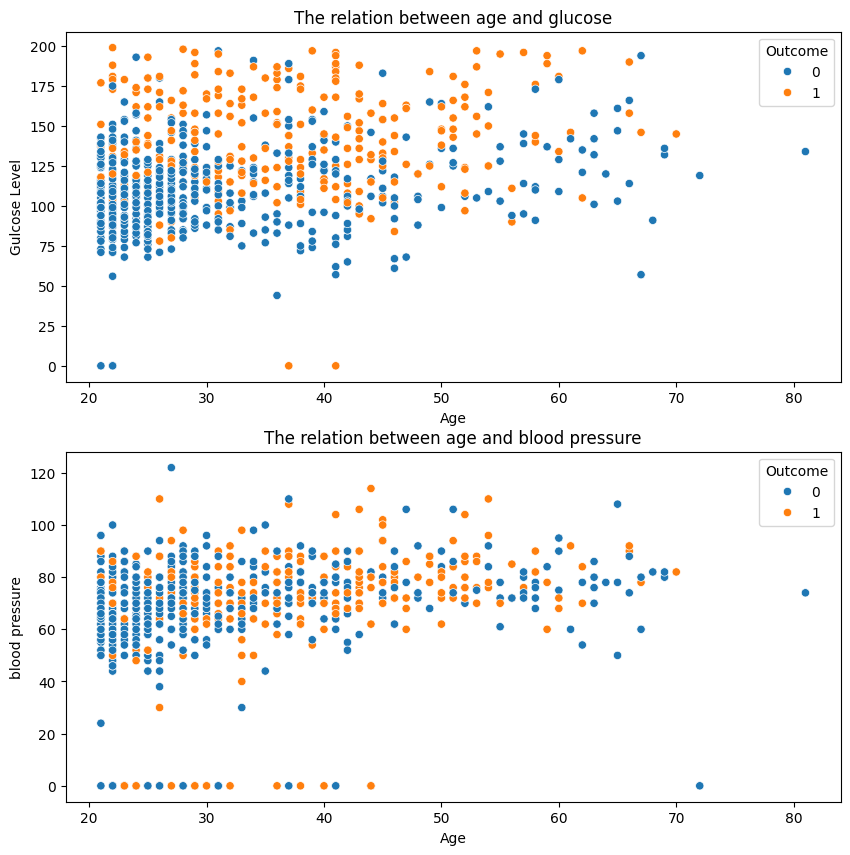

In [304]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.scatterplot(data=diabetes_df,x='Age',y='Glucose',hue='Outcome')
plt.title("The relation between age and glucose")
plt.xlabel("Age")
plt.ylabel("Gulcose Level")
# plt.show()
plt.subplot(2,1,2)
sns.scatterplot(data=diabetes_df,x='Age',y='BloodPressure',hue="Outcome")
plt.title("The relation between age and blood pressure")
plt.xlabel("Age")
plt.ylabel("blood pressure")
plt.show()



- In glucose level it increased and affect diabetes even in small ages with high percentage than blood pressure
- Both of them get higher value in older ages

- there is a dirrect relation between blood pressure and glucose levels?

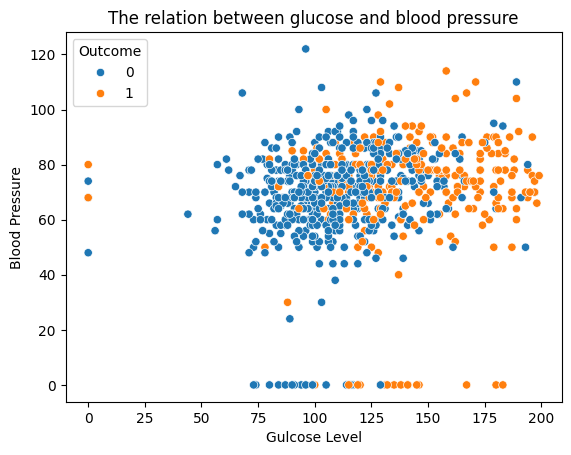

In [305]:
plt.figure()
sns.scatterplot(data=diabetes_df,x='Glucose',y='BloodPressure',hue='Outcome')
plt.title("The relation between glucose and blood pressure")
plt.xlabel("Gulcose Level")
plt.ylabel("Blood Pressure")
plt.show()

- small number of peopls have a high glucose with high blood pressure

- average of BMI and diabetes diagnose

Text(0, 0.5, 'BMI Level')

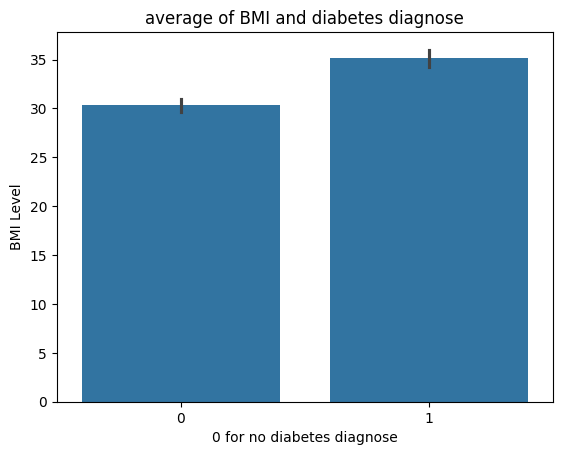

In [306]:
plt.figure()
sns.barplot(data=diabetes_df,x='Outcome',y='BMI')
plt.title("average of BMI and diabetes diagnose")
plt.xlabel("0 for no diabetes diagnose")
plt.ylabel("BMI Level")

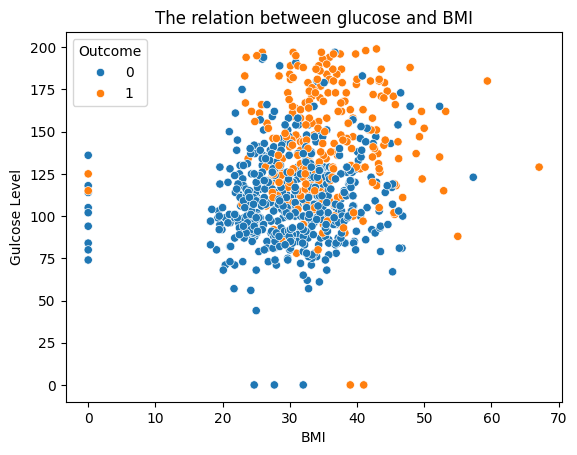

In [307]:
plt.figure
sns.scatterplot(data=diabetes_df,x='BMI',y='Glucose',hue='Outcome')
plt.title("The relation between glucose and BMI")
plt.xlabel("BMI")
plt.ylabel("Gulcose Level")
plt.show()

- higher BMI mean higher glucose levels

- See data distribution

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

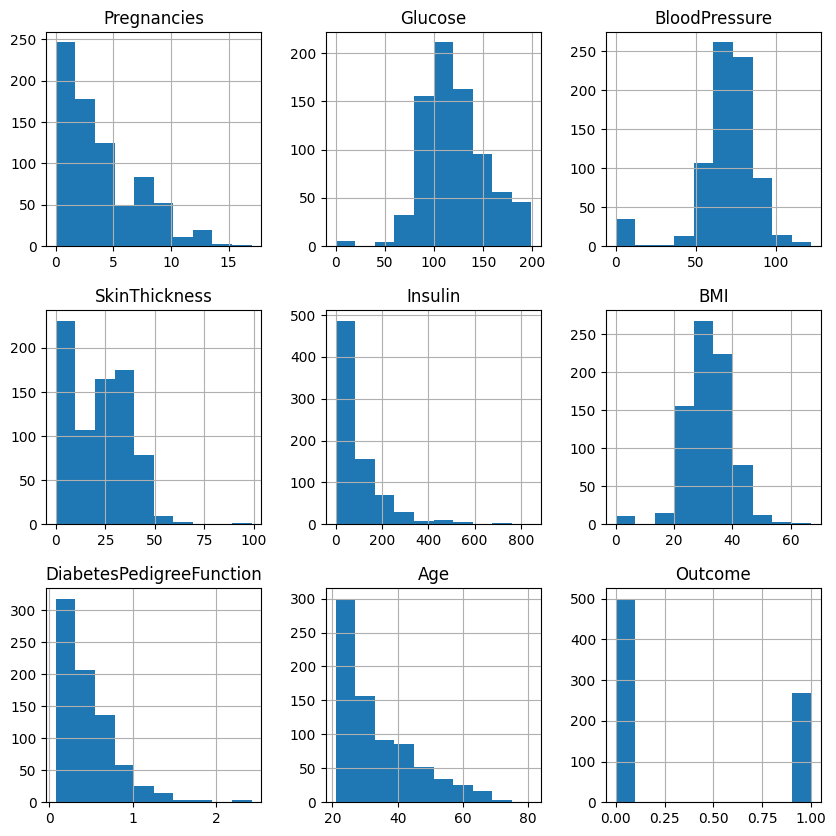

In [308]:
diabetes_df.hist(figsize=(10,10))

- insulin - DiabetesPedigreeFunction - Age has right skew so I will get the log tbe in normal distribution

In [309]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [310]:
diabetes_df['Age']=np.log(diabetes_df['Age']+1)
diabetes_df['DiabetesPedigreeFunction']=np.log(diabetes_df['DiabetesPedigreeFunction']+1)
# diabetes_df['Insulin']=np.log(diabetes_df['Insulin']+1) # log this feature make problem in correlation cause of
#higher zero's so I will leave it

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

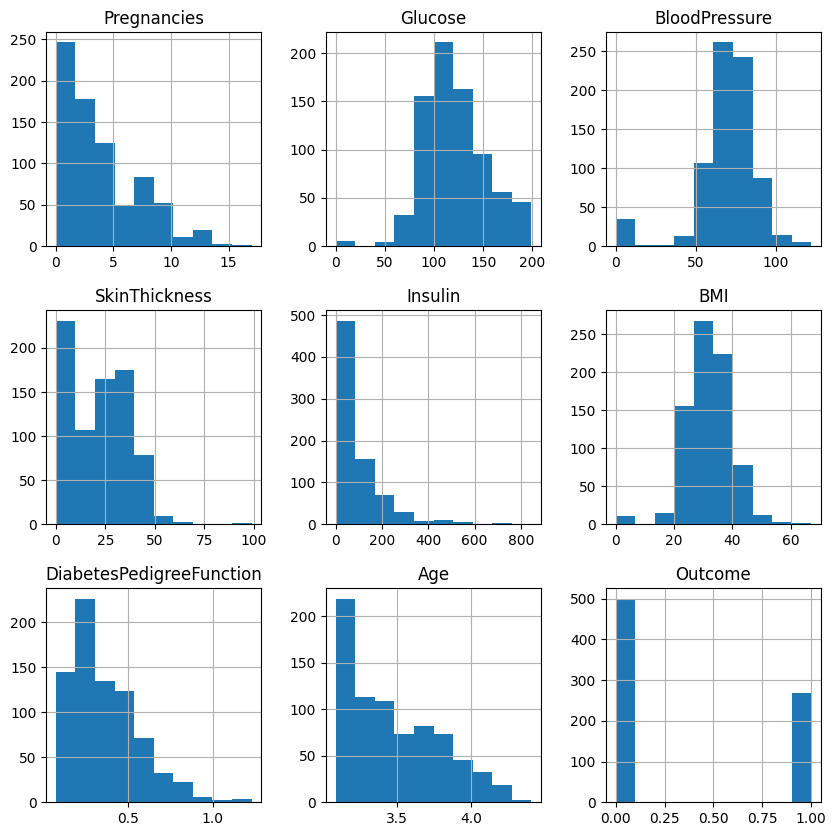

In [311]:
diabetes_df.hist(figsize=(10,10))

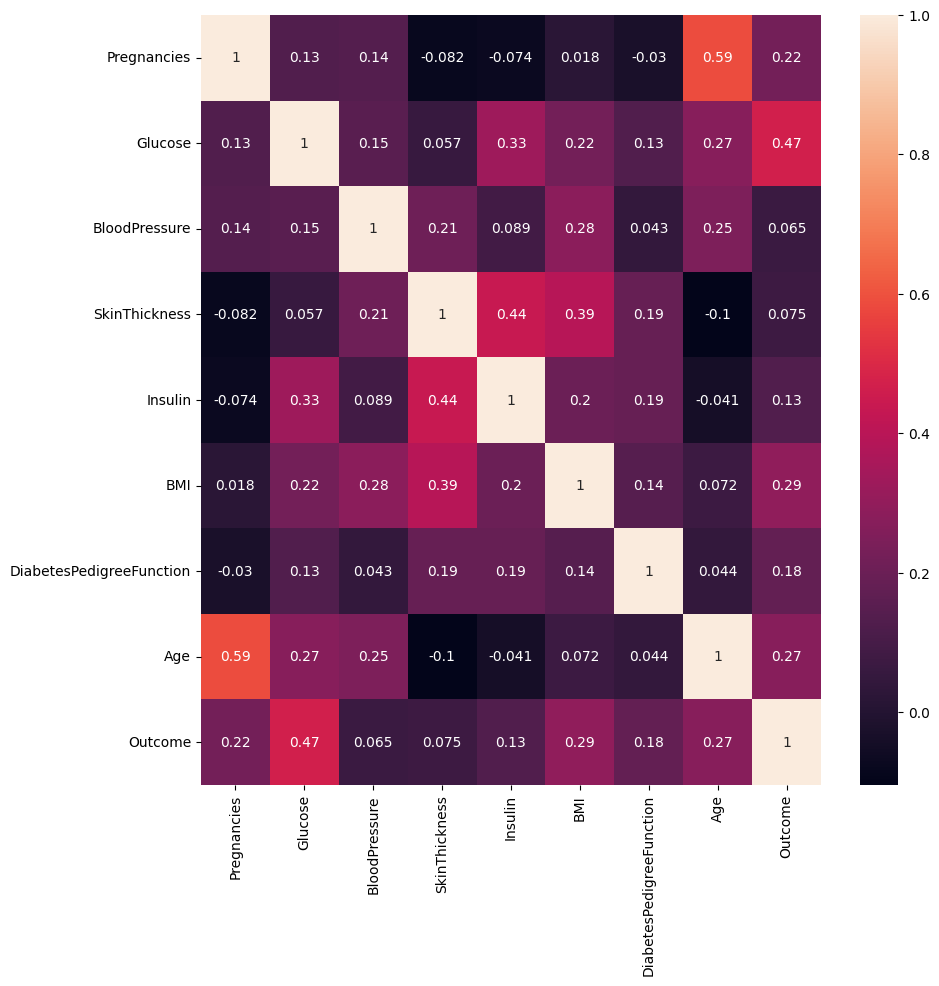

In [312]:
corr=diabetes_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

- No multicolinearity problem

In [313]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

- BloodPressure and SkinThickness features has a small affect on outcome so it is better to drop them

In [314]:
diabetes_df=diabetes_df.drop(columns=['BloodPressure', 'SkinThickness'])

In [315]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome'],
      dtype='object')

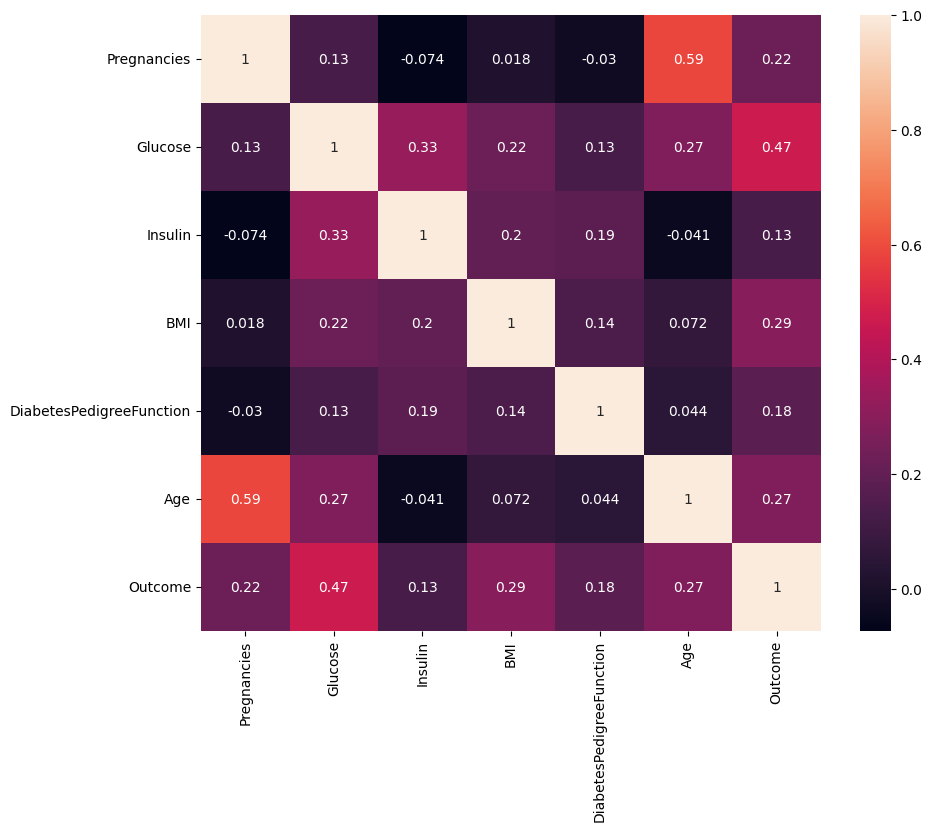

In [316]:
corr=diabetes_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

#Phase 2 : Prepare Data

In [317]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    float64
 6   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 42.1 KB


In [318]:
y=diabetes_df['Outcome']
x=diabetes_df.drop(columns=['Outcome'])

In [319]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 36.1 KB


In [320]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


- I will make two types of scaling normalization and standerdization cause I will try different models and it better to use normlization for some nd standerdization for some

In [321]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Phase 3 Model

## SVM

In [322]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model=Pipeline(
    steps=[
        ('scaler',StandardScaler()),
        ('classifier',SVC(kernel='rbf'))
    ]
)

In [323]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'classifier__C':[0.1,1,10,100],
    'classifier__gamma':[0.01,0.1,1,10]
}
grid_search=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    verbose=2
)

In [324]:
grid_search.fit(x_train,y_train)
print(f"Best Param: {grid_search.best_params_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END .............classifier__C=0.1, classifier__gamma=1; total time=   0.0s
[CV] END .............classifier__C=0.1, classif

In [325]:
best_perdiction=grid_search.predict(x_test)

In [326]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,best_perdiction)

0.7597402597402597

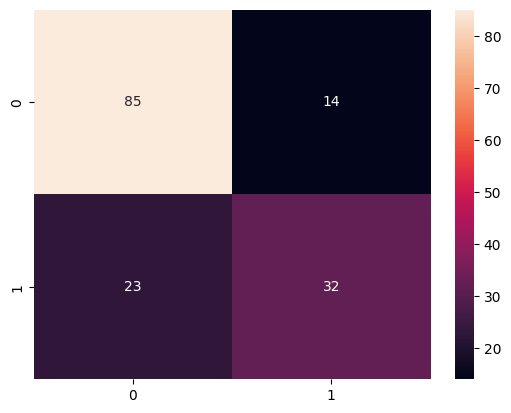

In [336]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_perdiction)
sns.heatmap(cm,annot=True)
plt.show()

## Logistic Regression

In [339]:
from sklearn.linear_model import LogisticRegression
logreg=Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('classifier',LogisticRegression(max_iter=100))
]
)
logreg.fit(x_train,y_train)
y_predict=logreg.predict(x_test)
accuracy_score(y_test,y_predict)

0.7597402597402597

## KNN

In [343]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
knn=Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('classifier',KNeighborsClassifier())
])
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['minkowski'],
    'classifier__p': [1, 2]
    }
grid_search=GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    verbose=2
)
grid_search.fit(x_train,y_train)
print(f"Best Param: {grid_search.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=distance; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=distance; total time=   0.0s
[CV] END classifier

In [344]:
y_predict=grid_search.predict(x_test)
accuracy_score(y_test,y_predict)

0.7597402597402597